# Task 2 of Second Machine Learning Homework
## Linear Regression in PyTorch

**Task**: Implement a linear regression model using PyTorch to predict the target variable $y$. Train the model to minimize the Mean Squared Error (MSE).

**Dataset**: Use the following code to generate a synthetic dataset with 100 samples, each with one feature:

```py
import numpy as np
np.random.seed(0)
X = np.random.uniform(-10, 10, 100)
epsilon = np.random.normal(0, 0.1, 100)
y = 3 * X + 4 + epsilon
```

Epoch [100/1000], Loss: 0.2448
Epoch [200/1000], Loss: 0.0142
Epoch [300/1000], Loss: 0.0100
Epoch [400/1000], Loss: 0.0099
Epoch [500/1000], Loss: 0.0099
Epoch [600/1000], Loss: 0.0099
Epoch [700/1000], Loss: 0.0099
Epoch [800/1000], Loss: 0.0099
Epoch [900/1000], Loss: 0.0099
Epoch [1000/1000], Loss: 0.0099


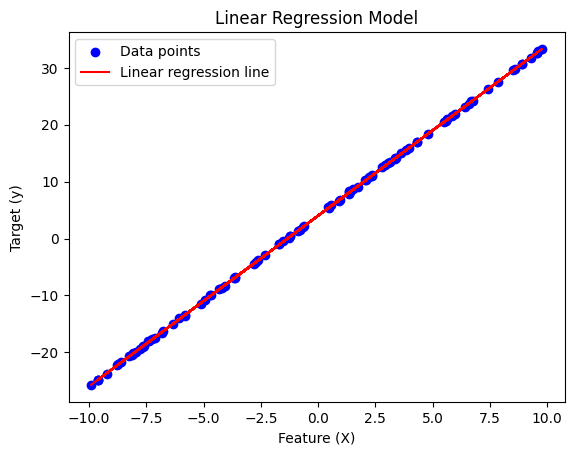

Learned slope: 2.9997, Learned intercept: 4.0191
Learned linear function: y = 2.9997x + 4.0191


In [3]:
import torch
import numpy as np
import matplotlib.pyplot as plt

def train_linear_regression(X, y, num_epochs=1000, lr=0.01):
    # Convert data
    X_tensor = torch.tensor(X, dtype=torch.float32).view(-1, 1)
    y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)

    # Model class
    class LinearRegressionModel(torch.nn.Module):
        def __init__(self):
            super(LinearRegressionModel, self).__init__()
            self.linear = torch.nn.Linear(1, 1)

        def forward(self, x):
            return self.linear(x)

    model = LinearRegressionModel()

    # MSE loss function and optimizer
    criterion = torch.nn.MSELoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=lr)

    # Train
    for epoch in range(num_epochs):
        y_pred = model(X_tensor)
        loss = criterion(y_pred, y_tensor)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Print loss every 100 epochs
        if (epoch + 1) % 100 == 0:
            print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

    return model

# Seed for reproducibility
np.random.seed(0)
torch.manual_seed(0)

# Dataset
X = np.random.uniform(-10, 10, 100)
epsilon = np.random.normal(0, 0.1, 100)
y = 3 * X + 4 + epsilon

# Train the model
model = train_linear_regression(X, y)

# Plot the results
plt.scatter(X, y, color='blue', label='Data points')
predicted_y = model(torch.tensor(X, dtype=torch.float32).view(-1, 1)).detach().numpy()
plt.plot(X, predicted_y, color='red', label='Linear regression line')
plt.xlabel('Feature (X)')
plt.ylabel('Target (y)')
plt.title('Linear Regression Model')
plt.legend()
plt.show()

# Print learned parameters (slope and intercept)
slope, intercept = model.linear.parameters()
print(f"Learned slope: {slope[0].item():.4f}, Learned intercept: {intercept[0].item():.4f}")

# Print the learned linear function
print(f"Learned linear function: y = {slope[0].item():.4f}x + {intercept[0].item():.4f}")
